<a href="https://colab.research.google.com/github/farhananwari07/ProjectML_145-157/blob/main/Model_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_po = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/train/Positif'
train_ne = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/train/Negatif'
val_po = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/validation/Positif'
val_ne = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/validation/Negatif'
test_po = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/test/Positif'
test_ne = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/test/Negatif'


In [10]:
dirtrain_po = os.listdir(train_po)
dirtrain_ne = os.listdir (train_ne)
dirval_po = os.listdir(val_po)
dirval_ne = os.listdir(val_ne)
dirtest_po = os.listdir(test_po)
dirtest_ne = os.listdir(test_ne)


In [11]:
print("data Negatif train : " + str(len(dirtrain_ne)))
print("data Negatif validation : " + str(len(dirval_ne)))
print("data Positif train : " + str(len(dirtrain_po)))
print("data Positif validation : " + str(len(dirval_po)))

data Negatif train : 342
data Negatif validation : 80
data Positif train : 342
data Positif validation : 80


In [ ]:
import shutil

files = os.listdir(val_po)

# memindahkan 70% file
for file in files[0:43]:
  new_path = shutil.move(f"{val_po}/{file}", val_po)

In [8]:
import shutil

files = os.listdir(val_ne)

# memindahkan 70% file
for file in files[0:5]:
  new_path = shutil.move(f"{val_ne}/{file}", train_ne)

In [9]:
import shutil

files = os.listdir(val_po)

# memindahkan 70% file
for file in files[0:5]:
  new_path = shutil.move(f"{val_po}/{file}", train_po)

In [ ]:
import shutil

files = os.listdir(test_ne)

# memindahkan 70% file
for file in files[0:39]:
  new_path = shutil.move(f"{test_ne}/{file}", train_ne)

In [6]:
from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
    rescale=1./255
)  

In [ ]:
train_dir = '/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/train'
train_gen = augs_gen.flow_from_directory(
    train_dir,
    target_size = (120,120),
    batch_size=32,
    color_mode='rgb',
    class_mode = 'categorical',
    shuffle = False
)

Found 674 images belonging to 2 classes.


In [ ]:
val_dir ='/content/drive/MyDrive/Praktikum Kelompok_1/model_covid/validation'
val_gen = augs_gen.flow_from_directory(
    val_dir,
    target_size=(120,120),
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = False
)

Found 170 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, Dropout, GlobalMaxPool2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Activation

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[120,120,3]))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=3, strides=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(rate=0.5))
model.add(Conv2D(filters=64, kernel_size=3, strides=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(rate=0.4))
model.add(Conv2D(filters=32, kernel_size=3, strides=5, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(rate=0.4))

model.add(GlobalMaxPool2D())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 120, 120, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 128)       3584      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 128)       0         
                                                        

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, decay = 0.001/32),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(train_gen, batch_size=32, epochs=100, validation_data=(val_gen))

Epoch 1/100
22/22 [==============================] - 75s 3s/step - loss: 0.7047 - acc: 0.4941 - val_loss: 0.6946 - val_acc: 0.5000
Epoch 2/100
22/22 [==============================] - 75s 3s/step - loss: 0.6983 - acc: 0.5000 - val_loss: 0.6937 - val_acc: 0.5000
Epoch 3/100
22/22 [==============================] - 75s 3s/step - loss: 0.6992 - acc: 0.5059 - val_loss: 0.6930 - val_acc: 0.5000
Epoch 4/100
22/22 [==============================] - 75s 3s/step - loss: 0.6972 - acc: 0.4763 - val_loss: 0.6929 - val_acc: 0.5000
Epoch 5/100
22/22 [==============================] - 75s 3s/step - loss: 0.6952 - acc: 0.5015 - val_loss: 0.6924 - val_acc: 0.5000
Epoch 6/100
22/22 [==============================] - 75s 3s/step - loss: 0.6947 - acc: 0.5119 - val_loss: 0.6917 - val_acc: 0.5235
Epoch 7/100
22/22 [==============================] - 75s 3s/step - loss: 0.6971 - acc: 0.4733 - val_loss: 0.6913 - val_acc: 0.5353
Epoch 8/100
22/22 [==============================] - 75s 3s/step - loss: 0.6946 - a

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np



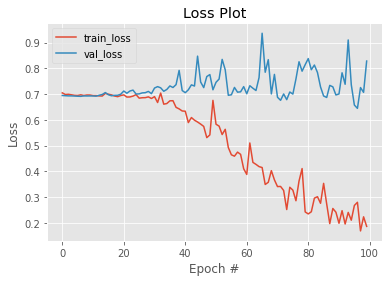

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

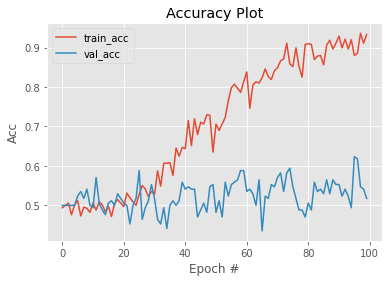

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
%cd /content/drive/MyDrive/Praktikum Kelompok_1/model_covid

/content/drive/MyDrive/Praktikum Kelompok_1/model_covid


In [ ]:
from keras.models import model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model5.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model5.h5")
print("Saved model to disk")

Saved model to disk
